# 02. 탐색적 데이터 분석 (EDA)

**목표**: 수집한 데이터의 패턴과 특성 파악

## 📋 분석 계획

1. 데이터 기본 정보 확인
2. 결측치 및 중복값 확인
3. 관객수 분포 분석
4. 장르별/시기별 관객수 분석
5. 검색량과 관객수의 관계
6. 감독/배우별 평균 관객수
7. 상관관계 분석

## 1. 라이브러리 및 데이터 로드

라이브러리 로드 완료!
현재 폰트: ['sans-serif']


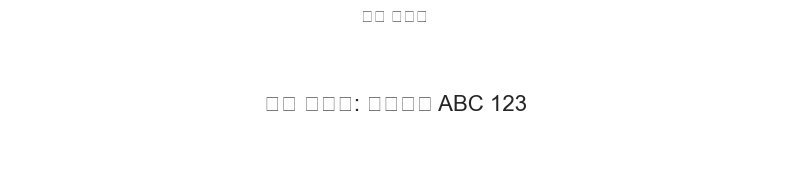

In [19]:
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Force rebuild font cache
matplotlib.font_manager._load_fontmanager(try_read_cache=False)

# Korean font setup for macOS
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# Graph style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Add project root path
sys.path.append('..')

from utils.data_collection import load_data

print("라이브러리 로드 완료!")
print(f"현재 폰트: {plt.rcParams['font.family']}")

# Font test
fig, ax = plt.subplots(figsize=(8, 2))
ax.text(0.5, 0.5, '한글 테스트: 가나다라 ABC 123', ha='center', va='center', fontsize=16)
ax.axis('off')
plt.title('폰트 테스트')
plt.tight_layout()
plt.show()

In [20]:
# 데이터 로드
boxoffice_df = load_data('data/raw/kobis_boxoffice.csv')
movie_details_df = load_data('data/raw/kobis_movie_details.csv')
search_trends_df = load_data('data/raw/naver_search_trends.csv')

print("데이터 로드 완료!")
print(f"박스오피스: {len(boxoffice_df)} 행")
print(f"영화 상세: {len(movie_details_df)} 행")
print(f"검색 트렌드: {len(search_trends_df)} 행")

데이터 로드 완료!
박스오피스: 16640 행
영화 상세: 1256 행
검색 트렌드: 7428 행


## 2. 데이터 기본 정보

In [21]:
# 박스오피스 데이터 정보
print("=== 박스오피스 데이터 ===")
print(boxoffice_df.info())
print("\n기본 통계량:")
boxoffice_df.describe()

=== 박스오피스 데이터 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16640 entries, 0 to 16639
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      16640 non-null  object
 1   rank      16640 non-null  int64 
 2   movieCd   16640 non-null  object
 3   movieNm   16640 non-null  object
 4   openDt    16640 non-null  object
 5   salesAmt  16640 non-null  int64 
 6   audiCnt   16640 non-null  int64 
 7   audiAcc   16640 non-null  int64 
 8   scrnCnt   16640 non-null  int64 
 9   showCnt   16640 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 1.3+ MB
None

기본 통계량:


,rank,salesAmt,audiCnt,audiAcc,scrnCnt,showCnt
count,16640.000000,1.664000e+04,1.664000e+04,1.664000e+04,16640.000000,16640.000000
mean,5.499099,2.419979e+08,2.458391e+04,1.136073e+06,476.261779,1331.219591
std,2.871572,6.762669e+08,6.666046e+04,2.230729e+06,454.728693,1914.923636
min,1.000000,4.100000e+05,1.740000e+02,2.450000e+02,1.000000,1.000000
25%,3.000000,1.686583e+07,1.905000e+03,3.084175e+04,145.000000,210.000000
50%,5.000000,4.648768e+07,4.951000e+03,2.338900e+05,344.000000,538.000000
75%,8.000000,1.712153e+08,1.774275e+04,1.115881e+06,667.000000,1622.000000
max,10.000000,1.202551e+10,1.219038e+06,1.397741e+07,2980.000000,17616.000000


In [22]:
# 영화 상세 정보
print("=== 영화 상세 정보 ===")
print(movie_details_df.info())
print("\n샘플 데이터:")
movie_details_df.head()

=== 영화 상세 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movieCd       1256 non-null   object 
 1   movieNm       1256 non-null   object 
 2   movieNmEn     1218 non-null   object 
 3   prdtYear      1255 non-null   float64
 4   openDt        1238 non-null   float64
 5   typeNm        1256 non-null   object 
 6   nations       1256 non-null   object 
 7   genres        1255 non-null   object 
 8   directors     1122 non-null   object 
 9   actors        1104 non-null   object 
 10  watchGradeNm  1242 non-null   object 
 11  distributors  1244 non-null   object 
dtypes: float64(2), object(10)
memory usage: 117.9+ KB
None

샘플 데이터:


,movieCd,movieNm,movieNmEn,prdtYear,openDt,typeNm,nations,genres,directors,actors,watchGradeNm,distributors
0,20192206,백두산,ASHFALL,2019.0,20191219.0,장편,한국,"어드벤처,드라마","김병서,이해준","이병헌,하정우,마동석,전혜진,배수지",12세이상관람가,"(주)씨제이이엔엠,(주)덱스터스튜디오"
1,20184571,천문: 하늘에 묻는다,Forbidden Dream,2019.0,20191226.0,장편,한국,사극,허진호,"최민식,한석규,신구,김홍파,허준호",12세이상관람가,롯데컬처웍스(주)롯데엔터테인먼트
2,20198414,시동,START-UP,2019.0,20191218.0,장편,한국,드라마,최정열,"마동석,박정민,정해인,염정아,최성은",15세이상관람가,(주)넥스트엔터테인먼트월드(NEW)
3,20196272,미드웨이,Midway,2019.0,20191231.0,장편,미국,"액션,드라마",롤랜드 에머리히,"에드 스크레인,패트릭 윌슨,우디 해럴슨,루크 에반스,아사노 타다노부",15세이상관람가,(주)누리픽쳐스
4,20197803,겨울왕국 2,Frozen 2,2019.0,20191121.0,장편,미국,애니메이션,"제니퍼 리,크리스 벅","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프",전체관람가,월트디즈니컴퍼니코리아 유한책임회사


In [23]:
# 검색 트렌드 정보
print("=== 검색 트렌드 데이터 ===")
print(search_trends_df.info())
print("\n기본 통계량:")
search_trends_df.describe()

=== 검색 트렌드 데이터 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7428 entries, 0 to 7427
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieNm  7428 non-null   object 
 1   openDt   7428 non-null   int64  
 2   date     7428 non-null   object 
 3   ratio    7428 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 232.3+ KB
None

기본 통계량:


,openDt,ratio
count,7.428000e+03,7428.000000
mean,2.020628e+07,20.018525
std,4.661411e+04,16.560856
min,1.987122e+07,5.000000
25%,2.020101e+07,8.900000
50%,2.021120e+07,14.900000
75%,2.023041e+07,24.425000
max,2.024073e+07,100.000000


## 3. 결측치 및 중복값 확인

In [24]:
# 결측치 확인
print("=== 박스오피스 결측치 ===")
missing_boxoffice = boxoffice_df.isnull().sum()
print(missing_boxoffice[missing_boxoffice > 0])

print("\n=== 영화 상세 결측치 ===")
missing_details = movie_details_df.isnull().sum()
print(missing_details[missing_details > 0])

print("\n=== 검색 트렌드 결측치 ===")
missing_search = search_trends_df.isnull().sum()
print(missing_search[missing_search > 0])

=== 박스오피스 결측치 ===
Series([], dtype: int64)

=== 영화 상세 결측치 ===
movieNmEn        38
prdtYear          1
openDt           18
genres            1
directors       134
actors          152
watchGradeNm     14
distributors     12
dtype: int64

=== 검색 트렌드 결측치 ===
Series([], dtype: int64)


In [25]:
# 중복값 확인
print("=== 중복값 확인 ===")
print(f"박스오피스 중복: {boxoffice_df.duplicated().sum()}")
print(f"영화 상세 중복: {movie_details_df.duplicated().sum()}")
print(f"검색 트렌드 중복: {search_trends_df.duplicated().sum()}")

=== 중복값 확인 ===
박스오피스 중복: 0
영화 상세 중복: 0
검색 트렌드 중복: 0


## 4. 관객수 분포 분석

In [26]:
# 영화별 최종 누적 관객수
final_audience = boxoffice_df.groupby('movieNm')['audiAcc'].max().reset_index()
final_audience.columns = ['movieNm', 'total_audience']

print("=== 관객수 통계 ===")
print(final_audience['total_audience'].describe())
print(f"\n평균 관객수: {final_audience['total_audience'].mean():,.0f} 명")
print(f"중앙값: {final_audience['total_audience'].median():,.0f} 명")

=== 관객수 통계 ===
count    1.252000e+03
mean     5.093926e+05
std      1.569234e+06
min      2.590000e+02
25%      7.501500e+03
50%      2.833950e+04
75%      2.086705e+05
max      1.397741e+07
Name: total_audience, dtype: float64

평균 관객수: 509,393 명
중앙값: 28,340 명


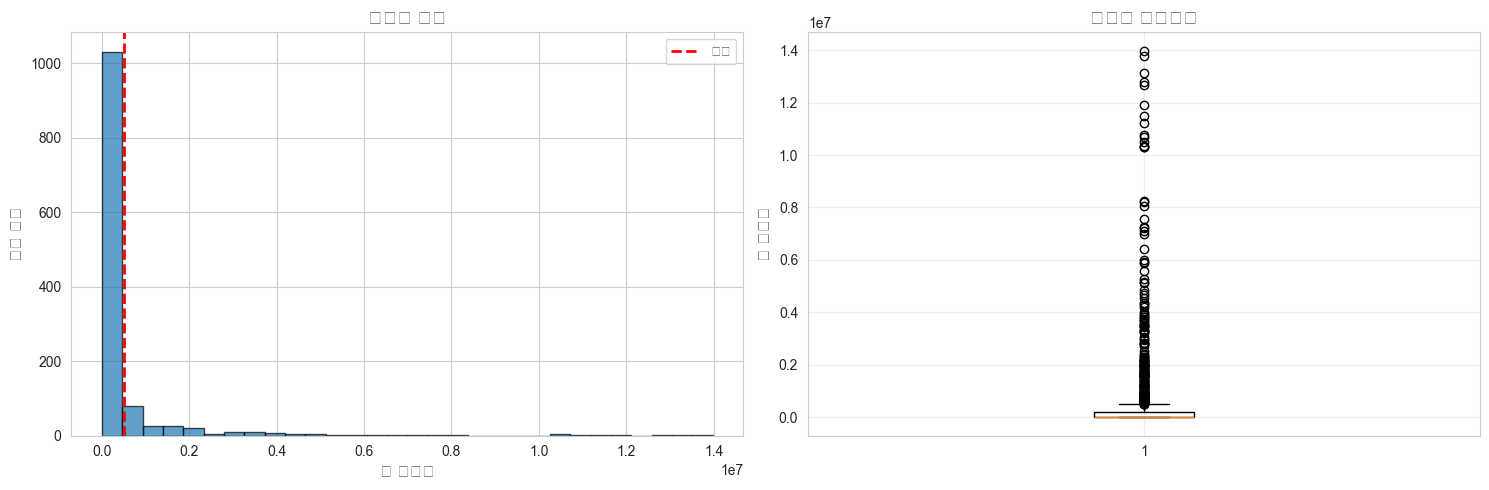

In [27]:
# 관객수 분포 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 히스토그램
axes[0].hist(final_audience['total_audience'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('총 관객수', fontsize=12)
axes[0].set_ylabel('영화 개수', fontsize=12)
axes[0].set_title('관객수 분포', fontsize=14, fontweight='bold')
axes[0].axvline(final_audience['total_audience'].mean(), color='red', 
                linestyle='--', linewidth=2, label='평균')
axes[0].legend()

# 박스플롯
axes[1].boxplot(final_audience['total_audience'])
axes[1].set_ylabel('총 관객수', fontsize=12)
axes[1].set_title('관객수 박스플롯', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

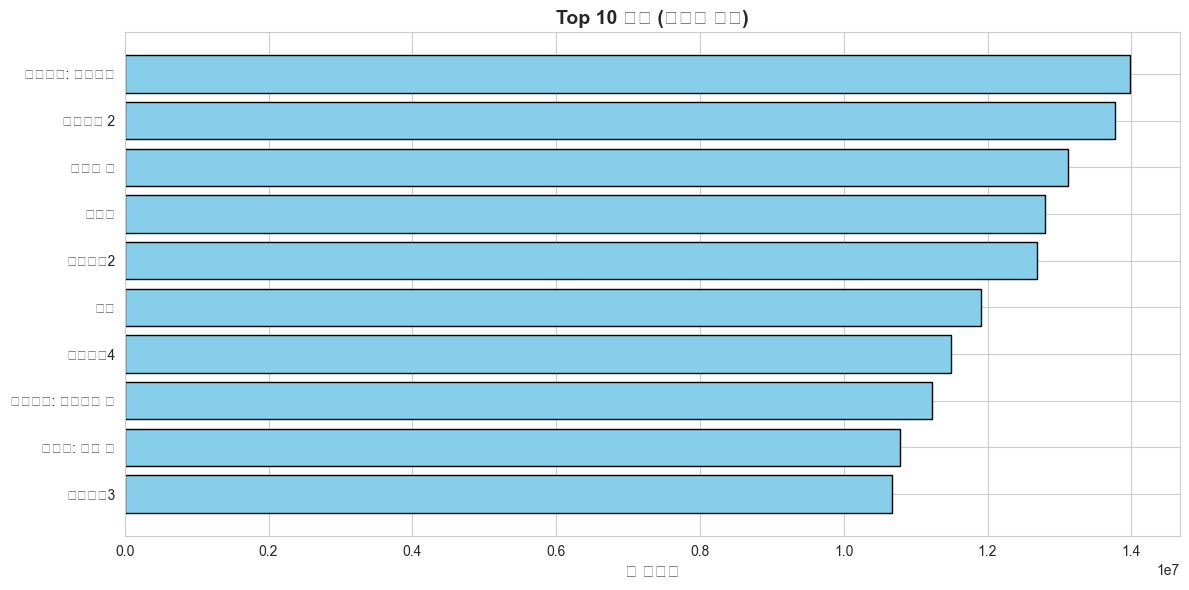

=== Top 10 영화 ===
           movieNm  total_audience
830     어벤져스: 엔드게임        13977409
64          겨울왕국 2        13766393
645          서울의 봄        13119454
803            알라딘        12797927
534          범죄도시2        12686210
1141            파묘        11902097
536          범죄도시4        11495435
831   어벤져스: 인피니티 워        11230721
774      아바타: 물의 길        10779111
535          범죄도시3        10675973


In [28]:
# Top 10 영화
top10_movies = final_audience.nlargest(10, 'total_audience')

plt.figure(figsize=(12, 6))
plt.barh(range(len(top10_movies)), top10_movies['total_audience'], color='skyblue', edgecolor='black')
plt.yticks(range(len(top10_movies)), top10_movies['movieNm'])
plt.xlabel('총 관객수', fontsize=12)
plt.title('Top 10 영화 (관객수 기준)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("=== Top 10 영화 ===")
print(top10_movies[['movieNm', 'total_audience']])

## 5. 장르별 분석

In [29]:
# 장르 데이터 준비
movie_with_audience = pd.merge(
    final_audience,
    movie_details_df[['movieNm', 'genres']],
    on='movieNm',
    how='left'
)

# 장르 분리 (콤마로 구분된 경우)
genre_audience = []
for _, row in movie_with_audience.iterrows():
    if pd.notna(row['genres']):
        genres = row['genres'].split(',')
        for genre in genres:
            genre_audience.append({
                'genre': genre.strip(),
                'total_audience': row['total_audience']
            })

genre_df = pd.DataFrame(genre_audience)

# 장르별 통계
genre_stats = genre_df.groupby('genre').agg({
    'total_audience': ['mean', 'median', 'count']
}).round(0)
genre_stats.columns = ['평균_관객수', '중앙값_관객수', '영화_수']
genre_stats = genre_stats.sort_values('평균_관객수', ascending=False)

print("=== 장르별 통계 ===")
print(genre_stats)

=== 장르별 통계 ===
             평균_관객수   중앙값_관객수  영화_수
genre                              
SF        1612859.0   66370.0    58
어드벤처      1188409.0  113459.0   120
사극        1166141.0  209886.0     6
액션        1134282.0  104699.0   257
판타지       1044987.0   36954.0    94
범죄         892081.0   64746.0    85
가족         863939.0   21848.0    40
뮤지컬        847100.0   22197.0    33
미스터리       586884.0   58352.0    60
스릴러        453319.0   29541.0   150
코미디        442742.0   47844.0   137
드라마        426144.0   21781.0   438
애니메이션      384748.0   37533.0   260
기타         371360.0   11674.0    18
전쟁         348256.0   14952.0    20
멜로/로맨스     268866.0   21803.0   145
공포(호러)     267539.0   26699.0    90
다큐멘터리       47607.0    9104.0    63
공연          32580.0   17704.0    38
서부극(웨스턴)     5792.0    5792.0     2
성인물(에로)       259.0     259.0     1


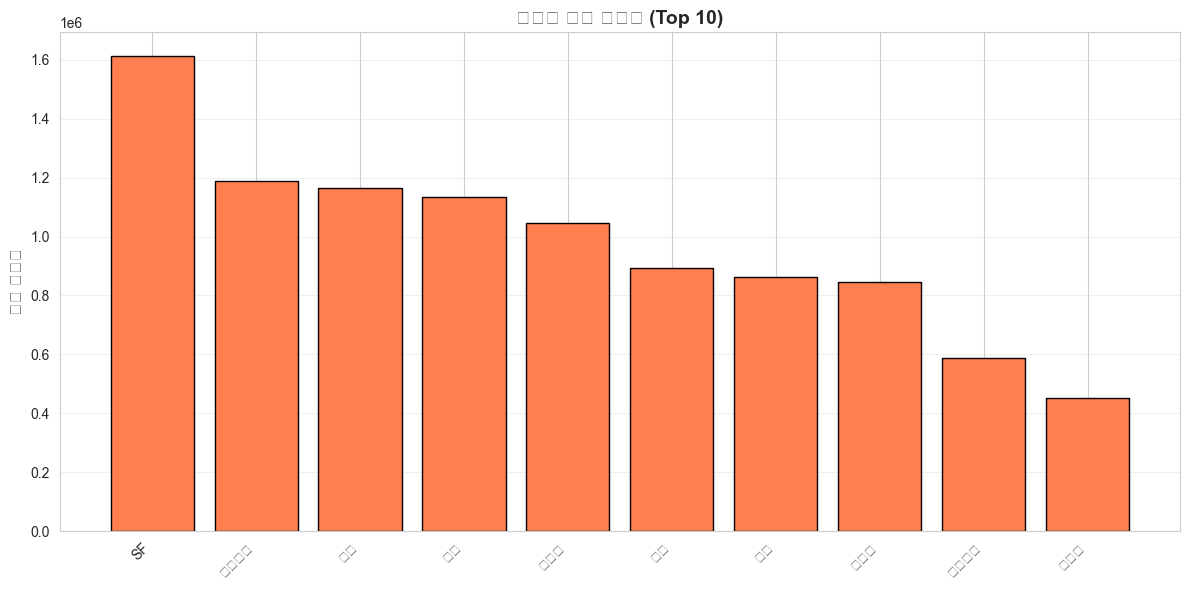

In [30]:
# 장르별 평균 관객수 시각화
plt.figure(figsize=(12, 6))
top_genres = genre_stats.head(10)
plt.bar(range(len(top_genres)), top_genres['평균_관객수'], color='coral', edgecolor='black')
plt.xticks(range(len(top_genres)), top_genres.index, rotation=45, ha='right')
plt.ylabel('평균 관객수', fontsize=12)
plt.title('장르별 평균 관객수 (Top 10)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 6. 개봉 시기별 분석

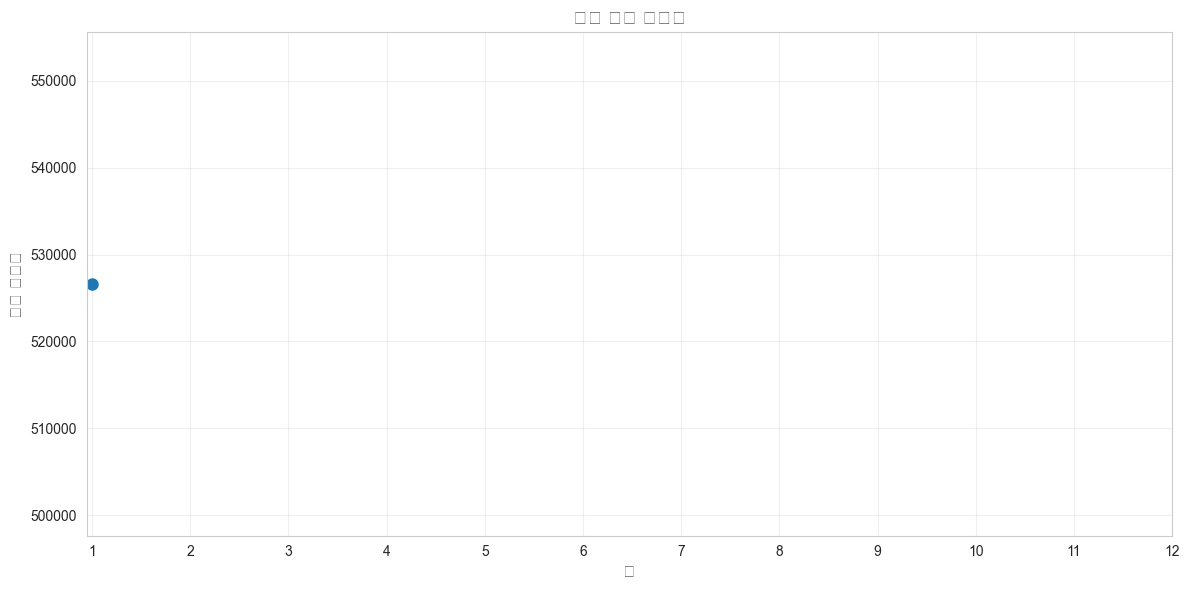

In [31]:
# 개봉일 데이터 준비
movie_with_date = pd.merge(
    final_audience,
    movie_details_df[['movieNm', 'openDt']],
    on='movieNm',
    how='left'
)

movie_with_date['openDt'] = pd.to_datetime(movie_with_date['openDt'])
movie_with_date['year'] = movie_with_date['openDt'].dt.year
movie_with_date['month'] = movie_with_date['openDt'].dt.month
movie_with_date['quarter'] = movie_with_date['openDt'].dt.quarter

# 월별 평균 관객수
monthly_avg = movie_with_date.groupby('month')['total_audience'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2, markersize=8)
plt.xlabel('월', fontsize=12)
plt.ylabel('평균 관객수', fontsize=12)
plt.title('월별 평균 관객수', fontsize=14, fontweight='bold')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [32]:
# 시즌별 분석
def get_season(month):
    if month in [7, 8]:
        return '여름 성수기'
    elif month in [12, 1, 2]:
        return '겨울 성수기'
    elif month in [4, 5, 6]:
        return '봄'
    else:
        return '가을'

movie_with_date['season'] = movie_with_date['month'].apply(get_season)

season_stats = movie_with_date.groupby('season')['total_audience'].agg(['mean', 'median', 'count'])
season_stats.columns = ['평균_관객수', '중앙값_관객수', '영화_수']

print("=== 시즌별 통계 ===")
print(season_stats)

=== 시즌별 통계 ===
              평균_관객수  중앙값_관객수  영화_수
season                             
가을       39049.35000  11063.0    40
겨울 성수기  526610.78636  30644.0  1217


## 7. 검색량과 관객수의 관계

검색량과 관객수의 상관계수: 0.645


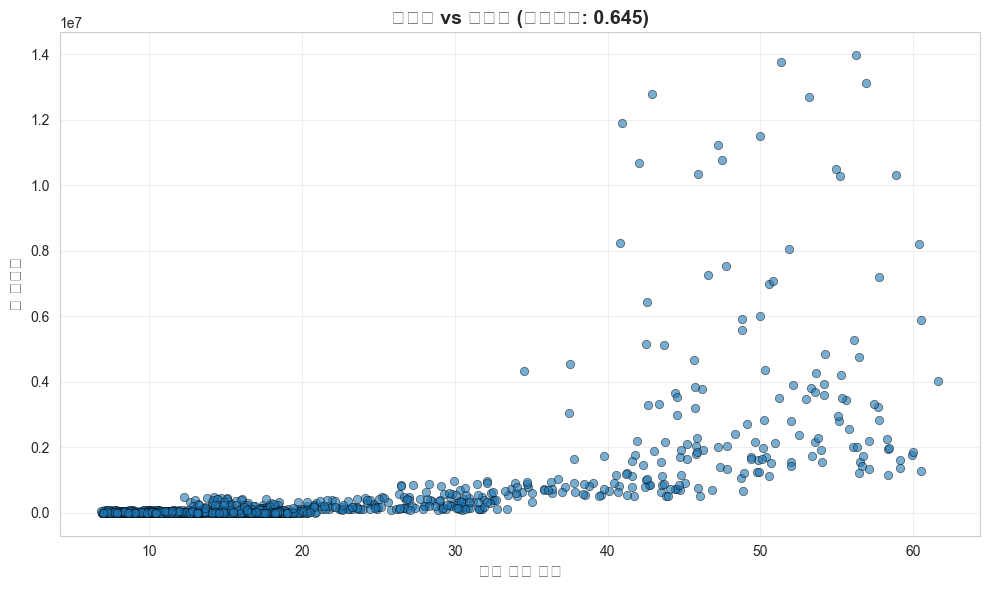

In [33]:
# 영화별 평균 검색량 계산
avg_search = search_trends_df.groupby('movieNm')['ratio'].mean().reset_index()
avg_search.columns = ['movieNm', 'avg_search_ratio']

# 관객수와 병합
search_audience = pd.merge(final_audience, avg_search, on='movieNm', how='inner')

# 상관계수
correlation = search_audience['total_audience'].corr(search_audience['avg_search_ratio'])
print(f"검색량과 관객수의 상관계수: {correlation:.3f}")

# 산점도
plt.figure(figsize=(10, 6))
plt.scatter(search_audience['avg_search_ratio'], search_audience['total_audience'], 
            alpha=0.6, edgecolors='k', linewidth=0.5)
plt.xlabel('평균 검색 지수', fontsize=12)
plt.ylabel('총 관객수', fontsize=12)
plt.title(f'검색량 vs 관객수 (상관계수: {correlation:.3f})', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 8. 감독/배우별 평균 관객수

=== 감독별 평균 관객수 (2편 이상) ===
        director  avg_audience  movie_count
9    제니퍼 리,크리스 벅  1.204559e+07            2
79           이상용  1.168109e+07            2
114        조스 웨던  8.795324e+06            2
22   조 루소,안소니 루소  8.410592e+06            3
71           류승완  4.367364e+06            2
43      크리스토퍼 놀란  4.002921e+06            9
108      제임스 카메론  3.964557e+06            3
39           김한민  3.942377e+06            3
99          존 왓츠  3.785678e+06            2
98         가이 리치  3.321463e+06            4


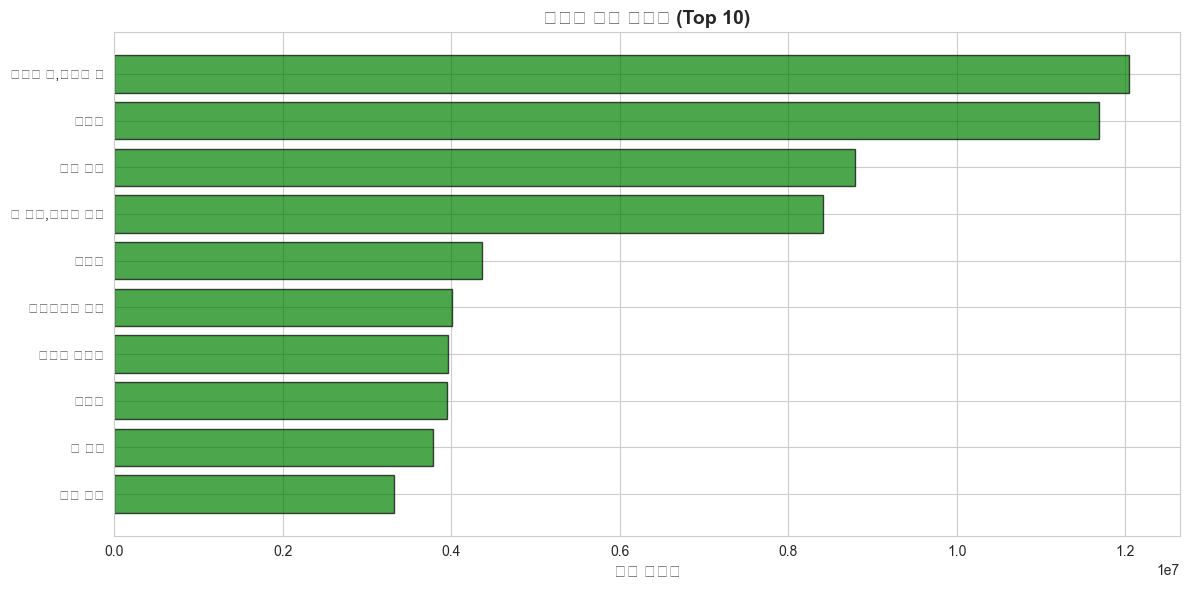

In [34]:
# 감독별 분석
director_audience = pd.merge(
    final_audience,
    movie_details_df[['movieNm', 'directors']],
    on='movieNm',
    how='left'
)

# 감독별 평균 관객수 (2편 이상 연출한 감독만)
director_stats = []
for director in director_audience['directors'].dropna().unique():
    movies = director_audience[director_audience['directors'] == director]
    if len(movies) >= 2:
        director_stats.append({
            'director': director,
            'avg_audience': movies['total_audience'].mean(),
            'movie_count': len(movies)
        })

if director_stats:
    director_df = pd.DataFrame(director_stats).sort_values('avg_audience', ascending=False)
    
    print("=== 감독별 평균 관객수 (2편 이상) ===")
    print(director_df.head(10))
    
    # 시각화
    top_directors = director_df.head(10)
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(top_directors)), top_directors['avg_audience'], color='green', alpha=0.7, edgecolor='black')
    plt.yticks(range(len(top_directors)), top_directors['director'])
    plt.xlabel('평균 관객수', fontsize=12)
    plt.title('감독별 평균 관객수 (Top 10)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("2편 이상 연출한 감독이 없습니다.")

## 9. 상관관계 분석

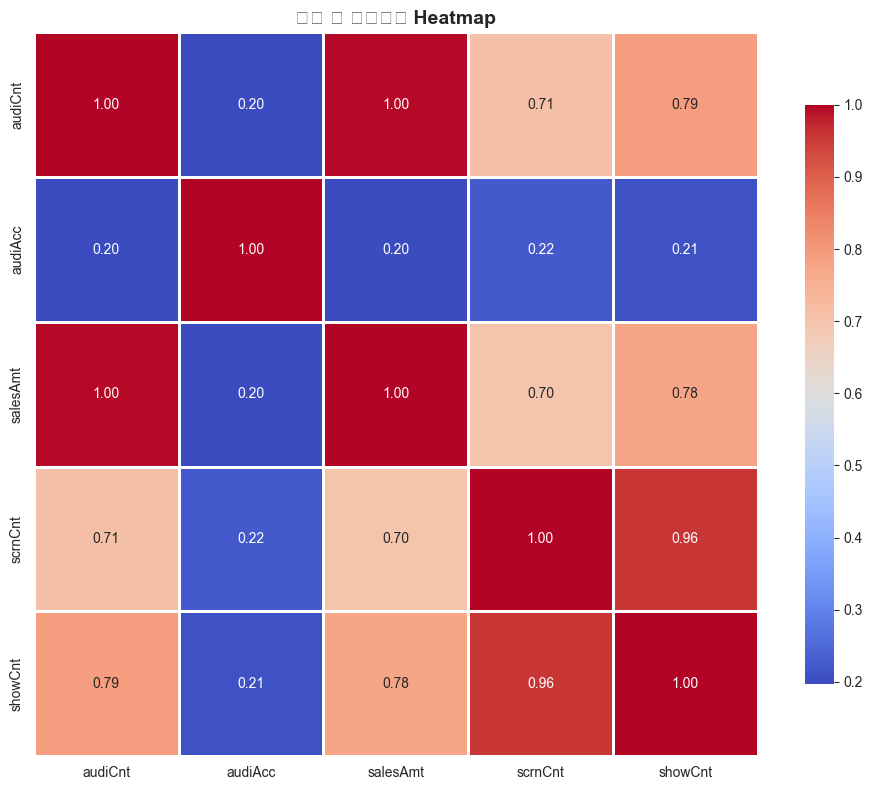

=== 상관계수 매트릭스 ===
           audiCnt   audiAcc  salesAmt   scrnCnt   showCnt
audiCnt   1.000000  0.197323  0.995588  0.710806  0.792069
audiAcc   0.197323  1.000000  0.199061  0.223542  0.208309
salesAmt  0.995588  0.199061  1.000000  0.699524  0.776658
scrnCnt   0.710806  0.223542  0.699524  1.000000  0.956400
showCnt   0.792069  0.208309  0.776658  0.956400  1.000000


In [35]:
# 수치형 변수들 간의 상관관계
# 샘플 데이터 준비 (일별 데이터에서)
numeric_data = boxoffice_df[['audiCnt', 'audiAcc', 'salesAmt', 'scrnCnt', 'showCnt']].copy()

# 상관계수 계산
correlation_matrix = numeric_data.corr()

# Heatmap 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('변수 간 상관관계 Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("=== 상관계수 매트릭스 ===")
print(correlation_matrix)

## 10. EDA 요약 및 인사이트

In [36]:
print("\n" + "="*60)
print("EDA 요약 및 주요 인사이트")
print("="*60)

print("\n📊 데이터 개요")
print(f"  - 총 영화 수: {len(final_audience)}편")
print(f"  - 평균 관객수: {final_audience['total_audience'].mean():,.0f}명")
print(f"  - 중앙값 관객수: {final_audience['total_audience'].median():,.0f}명")

print("\n📈 주요 발견사항")
print(f"  1. 검색량-관객수 상관계수: {correlation:.3f}")
print(f"  2. 장르별 차이: {genre_stats['평균_관객수'].max() / genre_stats['평균_관객수'].min():.1f}배")
print(f"  3. 시즌별 성수기 효과 확인")

print("\n⚠️ 데이터 품질")
print(f"  - 결측치: 전처리 필요")
print(f"  - 이상치: 확인됨 (극단적 흥행작/저조작)")

print("\n" + "="*60)
print("✅ EDA 완료!")
print("다음 단계: 03_preprocessing_feature_engineering.ipynb")
print("="*60)


EDA 요약 및 주요 인사이트

📊 데이터 개요
  - 총 영화 수: 1252편
  - 평균 관객수: 509,393명
  - 중앙값 관객수: 28,340명

📈 주요 발견사항
  1. 검색량-관객수 상관계수: 0.645
  2. 장르별 차이: 6227.3배
  3. 시즌별 성수기 효과 확인

⚠️ 데이터 품질
  - 결측치: 전처리 필요
  - 이상치: 확인됨 (극단적 흥행작/저조작)

✅ EDA 완료!
다음 단계: 03_preprocessing_feature_engineering.ipynb
